# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('../Data/checkins.csv.gz')
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [61]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth
ms = MeanShift(bandwidth=0.1, bin_seeding=True)
ms.fit(df)
len(ms.cluster_centers_)

3093

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

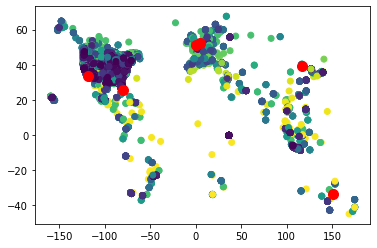

In [9]:
plt.scatter(data=df, x='longitude', y='latitude', c=ms.labels_, alpha=1)

offices = np.array([[-118.188740, 33.751277], 
           [-80.324116,25.867736], 
           [-0.075479,51.503016], 
           [4.885084,52.378894], 
           [117.036146,39.366487], 
           [151.205134,-33.868457]])

#plt.scatter(y = 33.751277, x = -118.188740, c = 'red', s = 100)
#plt.scatter(y = 25.867736, x = -80.324116, c = 'red', s = 100)
#plt.scatter(y = 51.503016, x = -0.075479, c = 'red', s = 100)
#plt.scatter(y = 52.378894, x = 4.885084, c = 'red', s = 100)
#plt.scatter(y = 39.366487, x = 117.036146, c = 'red', s = 100)
#plt.scatter(y = -33.868457, x = 151.205134, c = 'red', s = 100)

plt.scatter(y = offices[:,1], x = offices[:,0], c = 'red', s = 100)
plt.show()


###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [11]:
df2 = df.groupby(ms.labels_)['latitude'].count()
good_points = df2[df2 > 15]
len(good_points)

590

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [56]:
from scipy.spatial import distance
final_clusters = ms.cluster_centers_[good_points.index]
distances = [];
for elem in final_clusters:
    dist = float("inf")
    for j in range(len(offices)):
        dist = min(dist, distance.euclidean([offices[j,1], offices[j,0]], elem))
    distances.append(dist);

indexes = np.array(distances).argsort()[0:20]
result = final_clusters[indexes]
print(result);

[[-3.38606304e+01  1.51204776e+02]
 [ 5.23729640e+01  4.89231722e+00]
 [ 2.58830504e+01 -8.03078258e+01]
 [ 5.15029913e+01 -1.25537289e-01]
 [ 3.38098780e+01 -1.18148924e+02]
 [ 2.57858124e+01 -8.02179380e+01]
 [ 2.57053497e+01 -8.02834287e+01]
 [ 3.39318358e+01 -1.18141898e+02]
 [ 2.60100982e+01 -8.01999906e+01]
 [ 3.38883253e+01 -1.18048928e+02]
 [ 3.38729860e+01 -1.18362091e+02]
 [ 2.61162002e+01 -8.03937907e+01]
 [ 3.36432049e+01 -1.17946115e+02]
 [ 2.61208627e+01 -8.01589067e+01]
 [ 3.38112331e+01 -1.17890612e+02]
 [ 3.40603976e+01 -1.18248709e+02]
 [ 2.62005846e+01 -8.02507161e+01]
 [ 3.37317442e+01 -1.17825700e+02]
 [ 3.40354870e+01 -1.18438998e+02]
 [ 3.41380093e+01 -1.18168987e+02]]


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 